In [1]:
import pandas as pd

# 데이터 로드
data_path = r'C:\team_proj\dog_adoption\Mung_ai\dog_adopt_eda.csv'
df = pd.read_csv(data_path)

# 각 피처의 고유한 값들과 그 개수 확인
for column in df.columns:
    unique_values = df[column].unique()
    unique_count = len(unique_values)
    print(f"'{column}' 피처의 고유 값 개수: {unique_count}")
    print(f"'{column}' 피처의 고유 값들: {unique_values}\n")


'Unnamed: 0' 피처의 고유 값 개수: 1868
'Unnamed: 0' 피처의 고유 값들: [   1    2    3 ... 1866 1867 1868]

'품종' 피처의 고유 값 개수: 51
'품종' 피처의 고유 값들: ['믹스견' '비숑 프리제' '푸들' '말티즈' '웰시 코기 카디건' '잉글리쉬 포인터' '포메라니안' '치와와'
 '이탈리안 그레이 하운드' '시츄' '요크셔 테리어' '셔틀랜드 쉽독' '토이 푸들' '시바' '시베리안 허스키' '스피츠'
 '라브라도 리트리버' '진도견' '보스턴 테리어' '미디엄 푸들' '보더 콜리' '사모예드' '잭 러셀 테리어'
 '그레이트 피레니즈' '그레이 하운드' '올드 잉글리쉬 불독' '골든 리트리버' '라이카' '슈나우져' '프렌치 불독'
 '마리노이즈' '페키니즈' '휘펫' '삽살개' '닥스훈트' '코카 스파니엘' '아키다' '도베르만' '차우차우' '화이트테리어'
 '퍼그' '화이트리트리버' '웰시 코기 펨브로크' '베들링턴 테리어' '포인터' '빠삐용' '불독' '말라뮤트'
 '올드 잉글리쉬 쉽독' '저먼 셰퍼드 독' '셰퍼드']

'성별' 피처의 고유 값 개수: 3
'성별' 피처의 고유 값들: ['수컷' '암컷' '미상']

'무게(Kg)' 피처의 고유 값 개수: 83
'무게(Kg)' 피처의 고유 값들: [ 9.3   4.3   6.    4.5   5.2   2.6  23.    0.1  11.3   2.5   4.4   1.3
  1.1   2.4   4.1   5.5   2.2   3.2   5.8   3.8   3.5   2.8   2.9   3.
  3.6   3.9   2.3   2.    0.9   1.    1.8   5.   10.   15.   12.    7.
  0.5  20.    4.    8.   25.   18.    5.7  22.5  30.   45.    0.2   9.
  0.25 17.   16.   40.   22.    0.8  13.   14.    

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import category_encoders as ce

# 'Unnamed: 0' 피처 제거
df = df.drop(columns=['Unnamed: 0'])

# 1. 품종: Frequency Encoding (빈도수 인코딩)
df['품종_freq'] = df['품종'].map(df['품종'].value_counts())

# 2. 성별: Label Encoding
label_encoder = LabelEncoder()
df['성별'] = label_encoder.fit_transform(df['성별'])

# 3. 무게(Kg): Standard Scaling
scaler = StandardScaler()
df['무게(Kg)'] = scaler.fit_transform(df[['무게(Kg)']])

# 4. 상태: Label Encoding (입양 여부)
df['상태'] = label_encoder.fit_transform(df['상태'])

# 5. 나이: 그대로 사용 (숫자형 연속 데이터)
# 이미 숫자이므로 추가적인 인코딩 필요 없음

# 6. 성격: Label Encoding
df['성격'] = label_encoder.fit_transform(df['성격'])

# 7. 색: Label Encoding
df['색'] = label_encoder.fit_transform(df['색'])

# 8. 중성화유무: Label Encoding
df['중성화유무'] = label_encoder.fit_transform(df['중성화유무'])

# 9. 건강: Target Encoding
target_enc = ce.TargetEncoder(cols=['건강'])
df['건강'] = target_enc.fit_transform(df['건강'], df['상태'])

# 10. 칩등록여부: Label Encoding
df['칩등록여부'] = label_encoder.fit_transform(df['칩등록여부'])

# 11. 보유물건: Label Encoding
df['보유물건'] = label_encoder.fit_transform(df['보유물건'])

# 인코딩된 데이터프레임 확인
print(df.head())


       품종  성별    무게(Kg)  상태  나이  성격  색  중성화유무        건강  칩등록여부  보유물건  품종_freq
0     믹스견   1  0.233447   0  44   1  1      1  0.341880      0     0     1422
1  비숑 프리제   1 -0.489242   1  68   1  5      2  0.430473      0     0       19
2  비숑 프리제   1 -0.243527   1  32   1  5      2  0.430473      0     0       19
3      푸들   1 -0.460334   1  44   1  0      2  0.341880      0     0       61
4  비숑 프리제   2 -0.359158   1  67   1  5      0  0.430473      0     0       19


[I 2024-09-25 21:28:04,134] A new study created in memory with name: no-name-3cd4ba37-593e-4ec3-889d-8dfd4dd552b5
[I 2024-09-25 21:28:05,287] Trial 0 finished with value: 0.8313483423492178 and parameters: {'n_estimators': 365, 'max_depth': 4, 'learning_rate': 0.07504539777837492, 'subsample': 0.5727753603407018, 'colsample_bytree': 0.9800266222163815, 'min_child_weight': 2, 'gamma': 0.34587739463316713}. Best is trial 0 with value: 0.8313483423492178.
[I 2024-09-25 21:28:06,390] Trial 1 finished with value: 0.8206257996453503 and parameters: {'n_estimators': 477, 'max_depth': 6, 'learning_rate': 0.408358301391247, 'subsample': 0.7123668892318131, 'colsample_bytree': 0.7009892895084562, 'min_child_weight': 2, 'gamma': 0.9340459453385496}. Best is trial 0 with value: 0.8313483423492178.
[I 2024-09-25 21:28:07,377] Trial 2 finished with value: 0.823296895692577 and parameters: {'n_estimators': 376, 'max_depth': 5, 'learning_rate': 0.334444184577428, 'subsample': 0.7632902340414904, 'cols

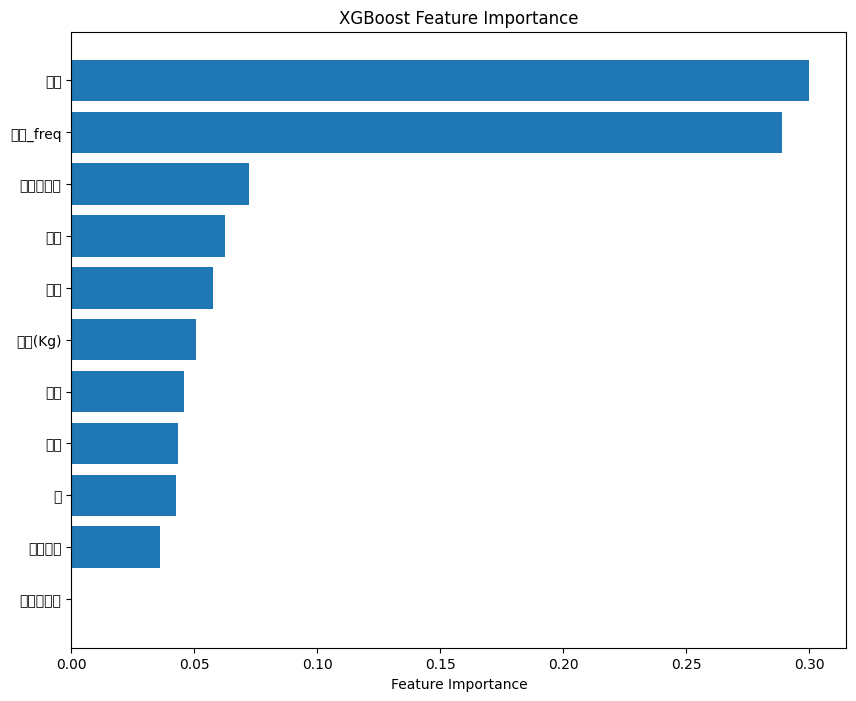

In [8]:
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
import matplotlib.pyplot as plt

# 인코딩 완료된 데이터프레임에서 X와 y 정의
X = df.drop(columns=['상태'])  # 피처 데이터
y = df['상태']  # 정답 레이블

# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 카테고리형 데이터를 수치형으로 변환 (옵션)
X_train = X_train.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
X_test = X_test.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)

# Optuna 최적화 목적 함수
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.0, 1.0),
        'enable_categorical': True  # 범주형 데이터 처리
    }


    # XGBoost 모델 생성
    model = xgb.XGBClassifier(**params, random_state=42)
    
    # 5겹 교차 검증을 통한 모델 성능 평가
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()

    return score

# Optuna 스터디 설정 및 최적화
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# 최적화된 하이퍼파라미터로 모델 학습
best_params = study.best_params
best_model = xgb.XGBClassifier(**best_params, random_state=42, enable_categorical=True)  # 여기에서도 추가
best_model.fit(X_train, y_train)

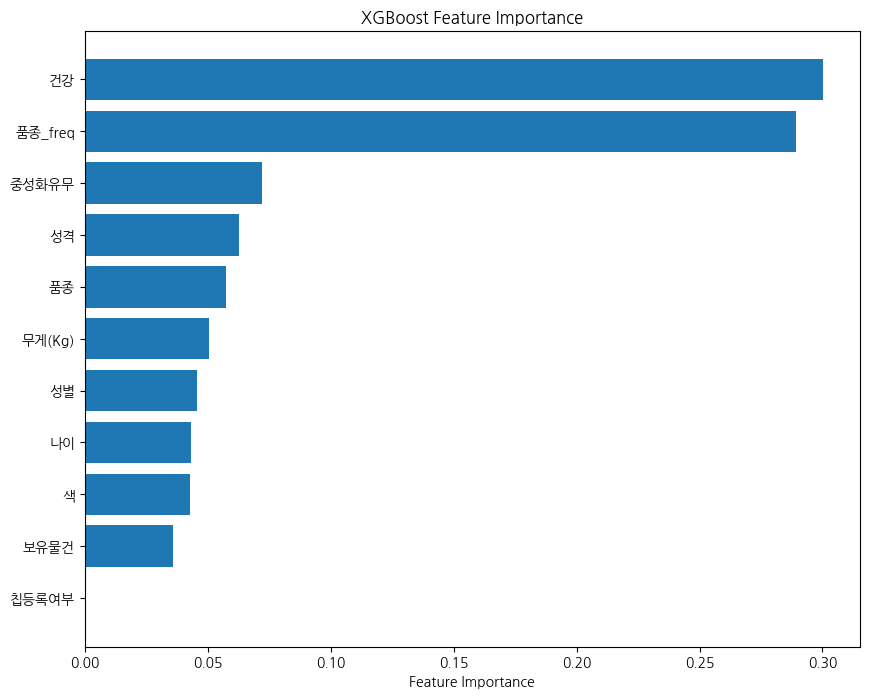

In [9]:
import koreanize_matplotlib

# 피처 중요도 시각화
def plot_feature_importance(model, X_train):
    importance = model.feature_importances_
    sorted_idx = importance.argsort()

    plt.figure(figsize=(10, 8))
    plt.barh(range(len(sorted_idx)), importance[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), X_train.columns[sorted_idx])
    plt.xlabel("Feature Importance")
    plt.title("XGBoost Feature Importance")
    plt.show()

# 피처 중요도 시각화 호출
plot_feature_importance(best_model, X_train)